<a href="https://colab.research.google.com/github/K-Viera/Python/blob/main/DesicionAnalysis/taller2Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split as ts
from sklearn.compose import ColumnTransformer
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing
import numpy as np

##Data
# df.isna().sum().sort_values() - numbers of data nulls
# df = df.dropna(subset=["Price"]) - delete nulls
# df.YearBuilt=df.YearBuilt.astype("str") - transform to category data
# df.describe(include = 'object') - describe variables categoricas

##Neural Network
#X_train.info() - info about the dataframe

#Punto 1

##Regresión Lineal

In [22]:
import pandas as pd
import statsmodels.formula.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Melbourne_housing_extra_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


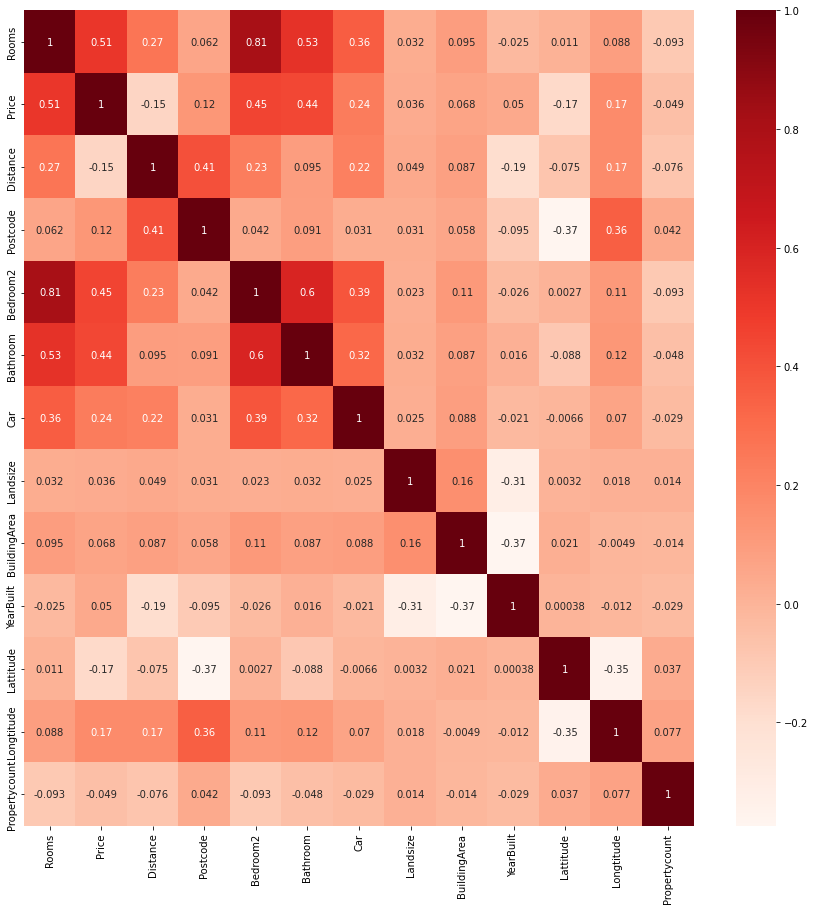

In [25]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(), cmap = 'Reds' , annot  = True)
plt.show()

In [26]:
formula1 = 'Price ~ Rooms'
model1 = sm.ols(formula = formula1, data = df)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     5395.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:11:11   Log-Likelihood:            -2.2549e+05
No. Observations:               15396   AIC:                         4.510e+05
Df Residuals:                   15394   BIC:                         4.510e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6.4e+04   1.42e+04      4.503      0.0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [28]:
df = df.dropna(subset=["Price"])

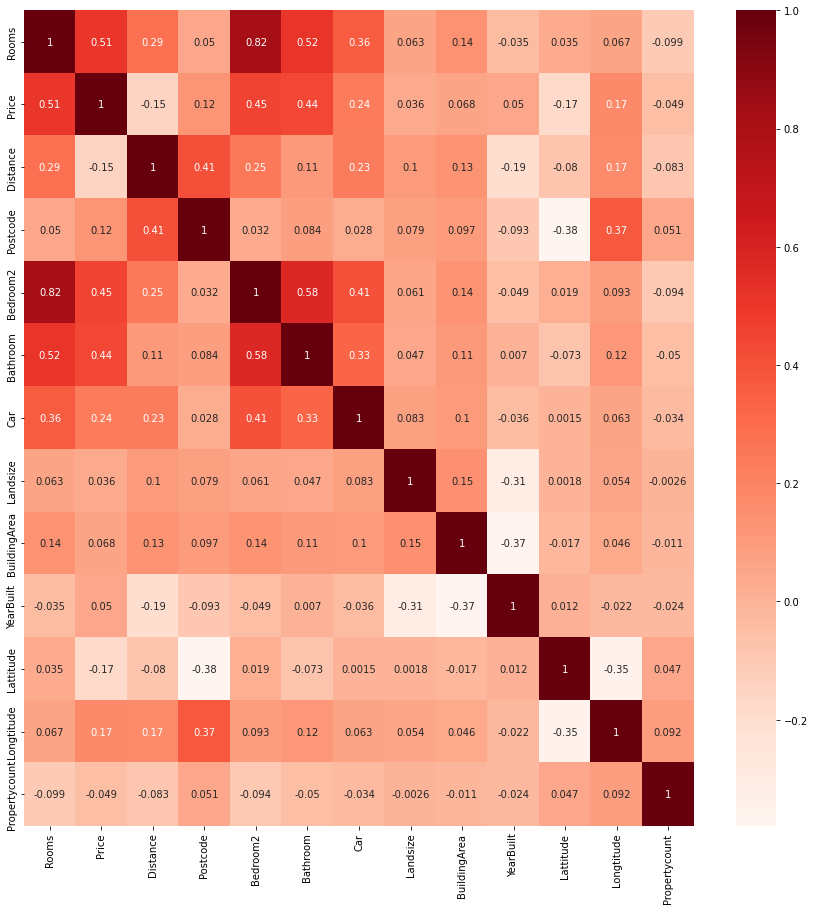

In [29]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(), cmap = 'Reds' , annot  = True)
plt.show()

In [30]:
df = df.dropna(subset=["Price"])

In [31]:
formula1 = 'Price ~ Rooms'
model1 = sm.ols(formula = formula1, data = df)
fitted1 = model1.fit()
print(fitted1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     5395.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:11:12   Log-Likelihood:            -2.2549e+05
No. Observations:               15396   AIC:                         4.510e+05
Df Residuals:                   15394   BIC:                         4.510e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     6.4e+04   1.42e+04      4.503      0.0

##Regresión Multivariada

In [32]:
import pandas as pd
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
import seaborn as sb

In [33]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Melbourne_housing_extra_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [35]:
df = df.drop('Address' , axis=1)
df = df.drop('BuildingArea',axis=1)
df = df.drop('YearBuilt',axis=1)

In [36]:
df = df.dropna(subset=["Price"])

In [37]:
df = df.dropna()

In [38]:
df.describe(include='object')

,Suburb,Type,Method,SellerG,Date,CouncilArea,Regionname
count,11646,11646,11646,11646,11646,11646,11646
unique,304,3,5,251,52,33,8
top,Reservoir,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,315,7762,7722,1394,473,1129,4224


In [39]:
formulaMV = 'Price ~ Rooms + Distance + Postcode +Bedroom2 + Bathroom +Car + Landsize + Lattitude + Longtitude + Propertycount '
modelMV = sm.ols(formula = formulaMV, data = df)
fittedMV = modelMV.fit()
print(fittedMV.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     1065.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        00:11:13   Log-Likelihood:            -1.6851e+05
No. Observations:               11646   AIC:                         3.370e+05
Df Residuals:                   11635   BIC:                         3.371e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.227e+08   7.18e+06    -17.100

##Red Neuronal MLP

In [40]:
#Tratamiento de Datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


#Modelado
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import set_config
import multiprocessing

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [42]:
#Obtención de datos

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Melbourne_housing_extra_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


###EDA

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19740 entries, 0 to 19739
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         19740 non-null  object 
 1   Address        19740 non-null  object 
 2   Rooms          19740 non-null  int64  
 3   Type           19740 non-null  object 
 4   Price          15396 non-null  float64
 5   Method         19740 non-null  object 
 6   SellerG        19740 non-null  object 
 7   Date           19740 non-null  object 
 8   Distance       19732 non-null  float64
 9   Postcode       19732 non-null  float64
 10  Bedroom2       15327 non-null  float64
 11  Bathroom       15327 non-null  float64
 12  Car            15327 non-null  float64
 13  Landsize       14944 non-null  float64
 14  BuildingArea   8617 non-null   float64
 15  YearBuilt      9351 non-null   float64
 16  CouncilArea    15296 non-null  object 
 17  Lattitude      15448 non-null  float64
 18  Longti

In [44]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,19740.000000,1.539600e+04,19732.000000,19732.000000,15327.000000,15327.000000,15327.000000,14944.000000,8617.000000,9351.000000,15448.000000,15448.000000,19732.000000
mean,2.947163,1.054957e+06,9.861509,3106.533904,2.900568,1.548509,1.578065,583.917090,196.806973,1874.165655,-37.811892,144.996632,7509.802706
std,0.981048,6.452557e+05,5.554233,88.429928,1.007491,0.713385,0.972221,3785.423175,561.558007,393.354888,0.072708,0.096178,4419.678648
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-38.182550,144.431620,249.000000
25%,2.000000,6.300000e+05,6.100000,3046.000000,2.000000,1.000000,1.000000,166.000000,94.000000,1930.000000,-37.856860,144.939323,4407.000000
50%,3.000000,8.800000e+05,9.200000,3101.000000,3.000000,1.000000,2.000000,420.000000,132.000000,1965.000000,-37.808965,145.000900,6567.000000
75%,4.000000,1.301000e+06,12.600000,3147.000000,3.000000,2.000000,2.000000,663.000000,199.000000,1997.000000,-37.761897,145.054710,10331.000000
max,12.000000,9.000000e+06,47.400000,3978.000000,30.000000,12.000000,26.000000,433014.000000,40468.000000,2106.000000,-37.413810,145.526350,21650.000000


In [45]:
df.describe(include='object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,19740,19740,19740,19740,19740,19740,15296,19732
unique,330,19403,3,9,308,52,33,8
top,Reservoir,5 Charles St,h,S,Nelson,27/05/2017,Boroondara,Southern Metropolitan
freq,548,5,12992,11478,2072,770,1664,7615


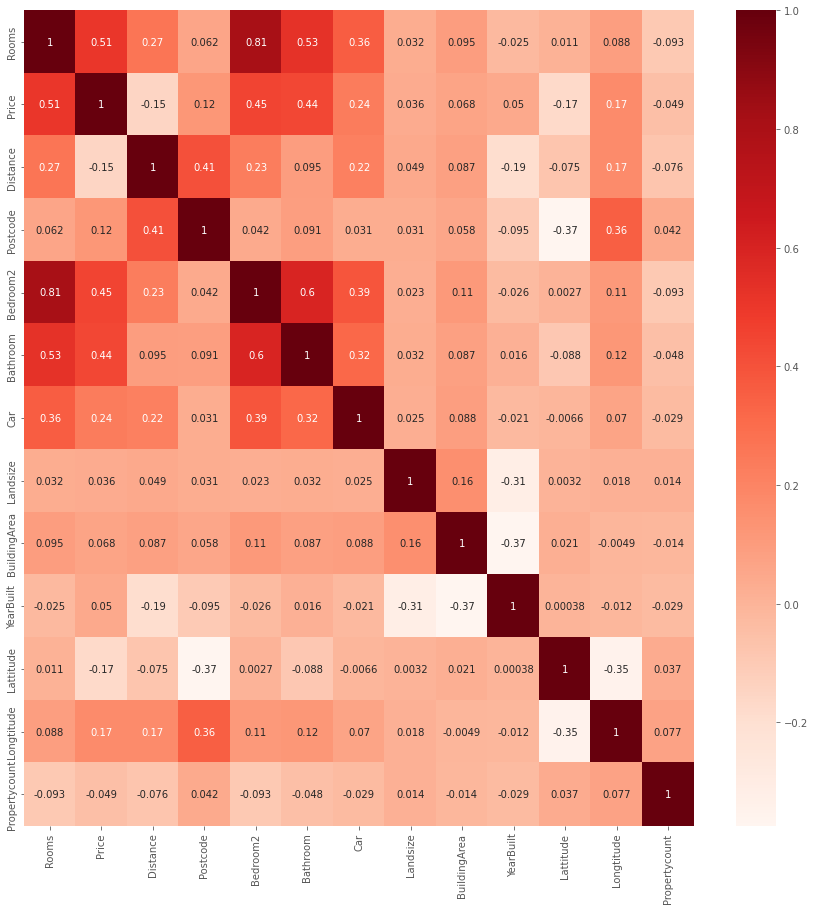

In [46]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap = 'Reds' , annot  = True)
plt.show()

Text(0.5, 0, 'Price')

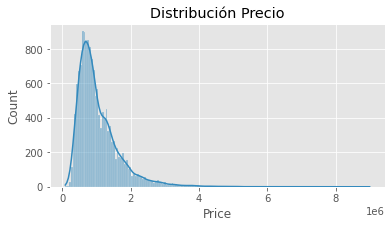

In [47]:
#Distribución de la variable respuesta
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='Price', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('Price')

###Limpieza de datos

In [48]:
df = df.drop('Address' , axis=1)
df = df.drop('BuildingArea',axis=1)
df = df.drop('YearBuilt',axis=1)

In [49]:
df = df.drop('SellerG',axis=1)
df = df.drop('Suburb',axis=1)
df = df.drop('Date', axis=1)

In [50]:
df = df.drop('CouncilArea', axis=1)

In [51]:
df = df.dropna(subset=["Price"])

In [52]:
df = df.dropna()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11649 entries, 1 to 19739
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          11649 non-null  int64  
 1   Type           11649 non-null  object 
 2   Price          11649 non-null  float64
 3   Method         11649 non-null  object 
 4   Distance       11649 non-null  float64
 5   Postcode       11649 non-null  float64
 6   Bedroom2       11649 non-null  float64
 7   Bathroom       11649 non-null  float64
 8   Car            11649 non-null  float64
 9   Landsize       11649 non-null  float64
 10  Lattitude      11649 non-null  float64
 11  Longtitude     11649 non-null  float64
 12  Regionname     11649 non-null  object 
 13  Propertycount  11649 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.3+ MB


###Train Test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('Price', axis = 'columns'),
                                        df['Price'],
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [58]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8154 entries, 6971 to 18219
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          8154 non-null   int64  
 1   Type           8154 non-null   object 
 2   Method         8154 non-null   object 
 3   Distance       8154 non-null   float64
 4   Postcode       8154 non-null   float64
 5   Bedroom2       8154 non-null   float64
 6   Bathroom       8154 non-null   float64
 7   Car            8154 non-null   float64
 8   Landsize       8154 non-null   float64
 9   Lattitude      8154 non-null   float64
 10  Longtitude     8154 non-null   float64
 11  Regionname     8154 non-null   object 
 12  Propertycount  8154 non-null   float64
dtypes: float64(9), int64(1), object(3)
memory usage: 891.8+ KB


In [59]:
df.describe(include='object')

,Type,Method,Regionname
count,11649,11649,11649
unique,3,5,8
top,h,S,Southern Metropolitan
freq,7765,7723,4227


###Preprocesado 

In [60]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [61]:
#Variables Numéricas
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

#Variables Categóricas
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Preprocesado
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

#Se aplica el preprocesamiento a las variables
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [62]:
#Se construye el DataFrame
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  8154 non-null   float64
 1   Distance                               8154 non-null   float64
 2   Postcode                               8154 non-null   float64
 3   Bedroom2                               8154 non-null   float64
 4   Bathroom                               8154 non-null   float64
 5   Car                                    8154 non-null   float64
 6   Landsize                               8154 non-null   float64
 7   Lattitude                              8154 non-null   float64
 8   Longtitude                             8154 non-null   float64
 9   Propertycount                          8154 non-null   float64
 10  Type_h                                 8154 non-null   float64
 11  Type

##Modelado

In [63]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [71]:
#Búsqueda de hiperparámetros
param_distributions = {
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    'modelo__alpha': np.logspace(-3, 3, 10),
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 1,
        scoring    = 'neg_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['Rooms',
                                                                                'Distance',
                                                                                'Postcode',
                                                                                'Bedroom2',
                                                                                'Bathroom',
                                                     

In [72]:
#Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
0,0.001,10,0.464159,-1.956914e+11,8.415038e+10,-1.290667e+11,8.161510e+09


In [67]:
#Búsqueda de hiperparámetros
# param_distributions = {
#     'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
#     'modelo__alpha': np.logspace(-3, 3, 10),
#     'modelo__learning_rate_init': [0.001, 0.01],
# }

# # Búsqueda por validación cruzada
# grid = RandomizedSearchCV(
#         estimator  = pipe,
#         param_distributions = param_distributions,
#         n_iter     = 5,
#         scoring    = 'r2',
#         n_jobs     = multiprocessing.cpu_count() - 1,
#         cv         = 5, 
#         verbose    = 0,
#         random_state = 123,
#         return_train_score = True
#        )

# grid.fit(X = X_train, y = y_train)

KeyboardInterrupt: ignored

In [70]:
#Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(10)

AttributeError: ignored

In [73]:
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

Error de test (rmse):  354607.1433532411


In [74]:
resultados = pd.DataFrame()
resultados['índice'] = np.arange(len(y_test))
resultados['y_real'] = y_test
resultados['y_predicha'] = predicciones
resultados['delta'] = resultados.y_real - resultados.y_predicha
resultados.head()

,índice,y_real,y_predicha,delta
0,0,NaN,6.531954e+05,NaN
1,1,1480000.0,1.406631e+06,73368.556054
2,2,1035000.0,3.551518e+05,679848.216153
3,3,NaN,6.499811e+05,NaN
4,4,1465000.0,5.194216e+05,945578.417687


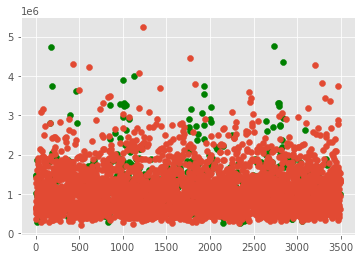

In [75]:
plt.scatter(resultados.índice, resultados.y_real, color = "green")
plt.scatter(resultados.índice, resultados.y_predicha)

Text(0.5, 0, 'precio')

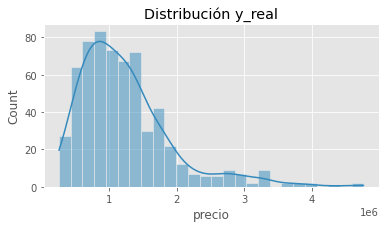

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=resultados.y_real, kde=True,ax=ax)
ax.set_title("Distribución y_real")
ax.set_xlabel('precio')

Text(0.5, 0, 'precio')

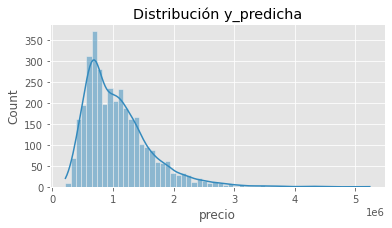

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=resultados.y_predicha, kde=True,ax=ax)
ax.set_title("Distribución y_predicha")
ax.set_xlabel('precio')

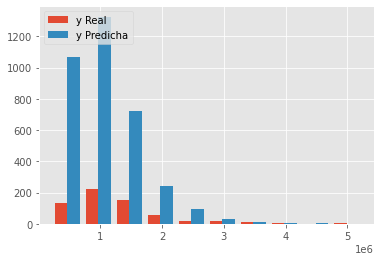

In [78]:
plt.hist([resultados.y_real, resultados.y_predicha], label=['y Real', 'y Predicha'])
plt.legend(loc='upper left')
plt.show()

#Punto 2

##Regresión Simple

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Universidad/Semestre 8/Análisis de Decisiones/Taller 2/CarPrice_Assignment.csv')
df.head()

In [ ]:
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(), cmap = 'Reds' , annot  = True)
plt.show()

In [ ]:
formula1 = 'price ~ enginesize'
model1 = sm.ols(formula = formula1, data = df)
fitted1 = model1.fit()
print(fitted1.summary())

##Regresion Multivariada

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Universidad/Semestre 8/Análisis de Decisiones/Taller 2/CarPrice_Assignment.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df = df.drop('car_ID' , axis=1)

In [ ]:
df.describe()

In [ ]:
formulaMV = 'price ~ symboling + wheelbase + carlength +carwidth + carheight + curbweight + enginesize + boreratio + stroke + compressionratio +  horsepower + peakrpm + citympg + highwaympg '
modelMV = sm.ols(formula = formulaMV, data = df)
fittedMV = modelMV.fit()
print(fittedMV.summary())

##Red Neuronal MLP

In [ ]:
#Tratamiento de Datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


#Modelado
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import set_config
import multiprocessing

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Obtención de datos

df = pd.read_csv('/content/drive/MyDrive/Universidad/Semestre 8/Análisis de Decisiones/Taller 2/CarPrice_Assignment.csv')
df.head()

###EDA

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include='object')

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap = 'Reds' , annot  = True)
plt.show()

In [ ]:
#Distribución de la variable respuesta
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='price', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('Price')

###Limpieza De Datos

In [ ]:
df = df.drop(['CarName','car_ID'],axis=1)

In [ ]:
df.info()

###Train Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('price', axis = 'columns'),
                                        df['price'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

###Preprocesado

In [ ]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [ ]:
#Variables Numéricas
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

#Variables Categóricas
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

#Preprocesado
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

#Se aplica el preprocesamiento a las variables
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [ ]:
#Se construye el DataFrame
encoded_cat = preprocessor.named_transformers_['cat']['onehot']\
              .get_feature_names(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

###Modelado

In [ ]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(max_iter= 1000))])

In [ ]:
modelo_final =pipe.fit(X_train, y_train)
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

In [ ]:
resultados = pd.DataFrame()
resultados['índice'] = np.arange(len(y_test))
resultados['y_real'] = y_test
resultados['y_predicha'] = predicciones
resultados['delta'] = resultados.y_real - resultados.y_predicha
resultados.head()

In [ ]:
plt.scatter(resultados.índice, resultados.y_real, color = "green")
plt.scatter(resultados.índice, resultados.y_predicha)

In [ ]:
plt.hist([resultados.y_real, resultados.y_predicha], label=['y Real', 'y Predicha'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=resultados.y_predicha, kde=True,ax=ax)
ax.set_title("Distribución y_predicha")
ax.set_xlabel('precio')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=resultados.y_real, kde=True,ax=ax)
ax.set_title("Distribución y_real")
ax.set_xlabel('precio')

#Punto 3

##Regresion Lineal

In [ ]:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/advertising.csv')
# df.head()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

In [ ]:
formulas=['Sales  ~ TV','Sales  ~ Radio','Sales  ~ Newspaper']
for f in formulas:
  print('Regresion ',f)
  model=sm.ols(formula = f, data = df.drop(df[df.Sales.isnull()].index, inplace = False))
  fitted_model = model.fit()
  print(fitted_model.summary())
  print('____________________________________________________________________________________')

##Regresión Multivariada

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm

import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Universidad/Semestre 8/Análisis de Decisiones/Taller 2/advertising.csv')
df.head()

In [ ]:
df.info()

In [ ]:
formulaMV = 'Sales ~ TV + Radio + Newspaper'
modelMV = sm.ols(formula = formulaMV, data = df)
fittedMV = modelMV.fit()
print(fittedMV.summary())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('Sales', axis = 'columns'),
                                        df['Sales'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

model_ols =  linear_model.LinearRegression(normalize=True)

model_ols.fit(X_train, y_train)
predicciones = model_ols.predict(X = X_test)

#predicciones = pd.Series(predicciones)

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)



In [ ]:
plt.scatter(y_test, model_ols.predict(X=X_test))
plt.xlabel('Sales From Dataset')
plt.ylabel('Sales Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Sales From Dataset Vs Sales Predicted By Model")

##Red Neuronal MLP

In [ ]:
#Tratamiento de Datos
import numpy as np
import pandas as pd

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')


#Modelado
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import set_config
import multiprocessing

#Advertencias
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Universidad/Semestre 8/Análisis de Decisiones/Taller 2/advertising.csv')
df.head()

###EDA

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap = 'Reds' , annot  = True)
plt.show()

In [ ]:
#Distribución de la variable respuesta
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=df, x='Sales', kde=True,ax=ax)
ax.set_title("Distribución Sales")
ax.set_xlabel('Sales')

###Train Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('Sales', axis = 'columns'),
                                        df['Sales'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

###Modelado

In [ ]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(max_iter= 1000))])

In [ ]:
modelo_final =pipe.fit(X_train, y_train)
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
print('Error de test (rmse): ', rmse)

In [ ]:
resultados = pd.DataFrame()
resultados['índice'] = np.arange(len(y_test))
resultados['y_real'] = y_test
resultados['y_predicha'] = predicciones
resultados['delta'] = resultados.y_real - resultados.y_predicha
resultados.head()

In [ ]:
plt.scatter(resultados.índice, resultados.y_real, color = "green")
plt.scatter(resultados.índice, resultados.y_predicha)

In [ ]:
plt.hist([resultados.y_real, resultados.y_predicha], label=['y Real', 'y Predicha'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=resultados.y_predicha, kde=True,ax=ax)
ax.set_title("Distribución y_predicha")
ax.set_xlabel('precio')

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=resultados.y_real, kde=True,ax=ax)
ax.set_title("Distribución y_real")
ax.set_xlabel('precio')